In [40]:
import numpy as np
import math
import matplotlib.pyplot as plt

## [Problem 8-1]
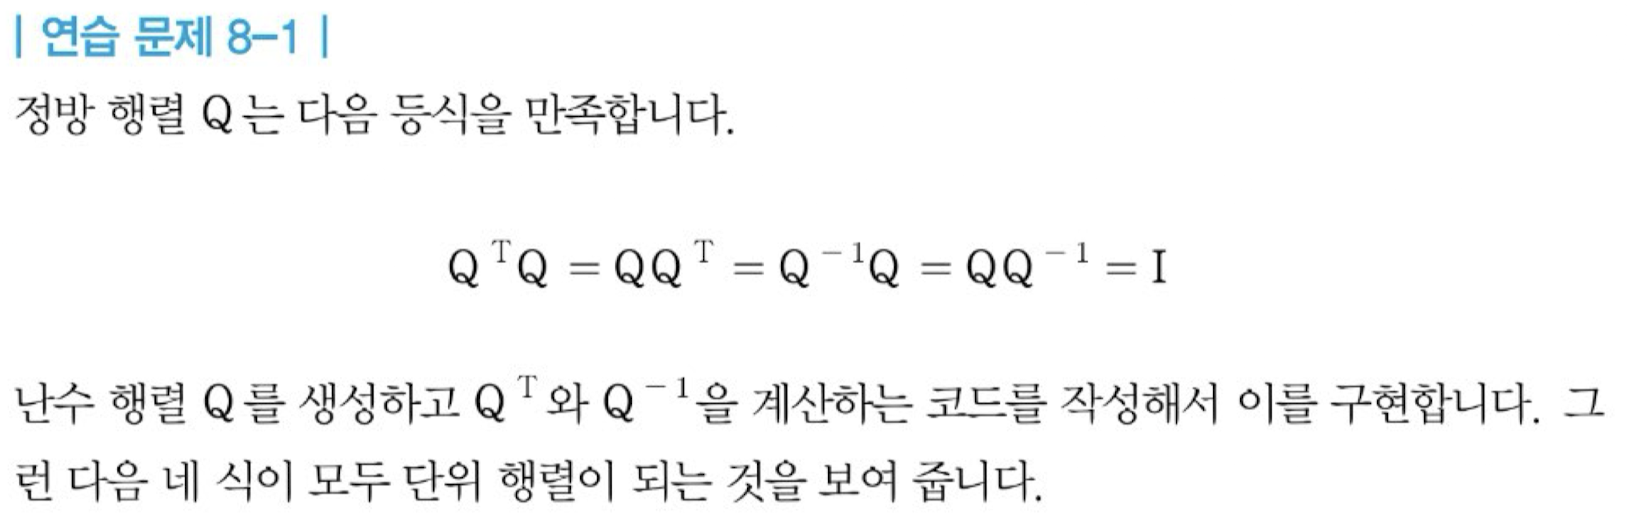

In [41]:
A = np.random.randn(5, 5)

Q, R = np.linalg.qr(A)
Q # 5x5 orthogonal matrix

array([[-0.72781997, -0.07507369,  0.15921023,  0.48752202,  0.44901718],
       [-0.07484134, -0.49456032,  0.41422824, -0.66417794,  0.37025867],
       [-0.46954716,  0.50063752, -0.459551  , -0.55646083,  0.08973161],
       [-0.49162135, -0.35404137,  0.06199636, -0.08210391, -0.78890973],
       [-0.0501077 ,  0.61138434,  0.76683531, -0.06928374, -0.1756752 ]])

In [42]:
Q_inv = np.linalg.inv(Q)

In [43]:
def check_identity(A):
  if np.sum(abs(np.eye(A.shape[0]) - A) < 1e-13) == A.shape[0] * A.shape[1]:
    print("Identity matrix")
  else:
    print("Not identity matrix")
  return

In [44]:
check_identity(Q.T @ Q)

Identity matrix


In [45]:
check_identity(Q @ Q.T)

Identity matrix


In [46]:
check_identity(Q_inv @ Q)

Identity matrix


In [47]:
check_identity(Q @ Q_inv)

Identity matrix


## [Problem 8-2]
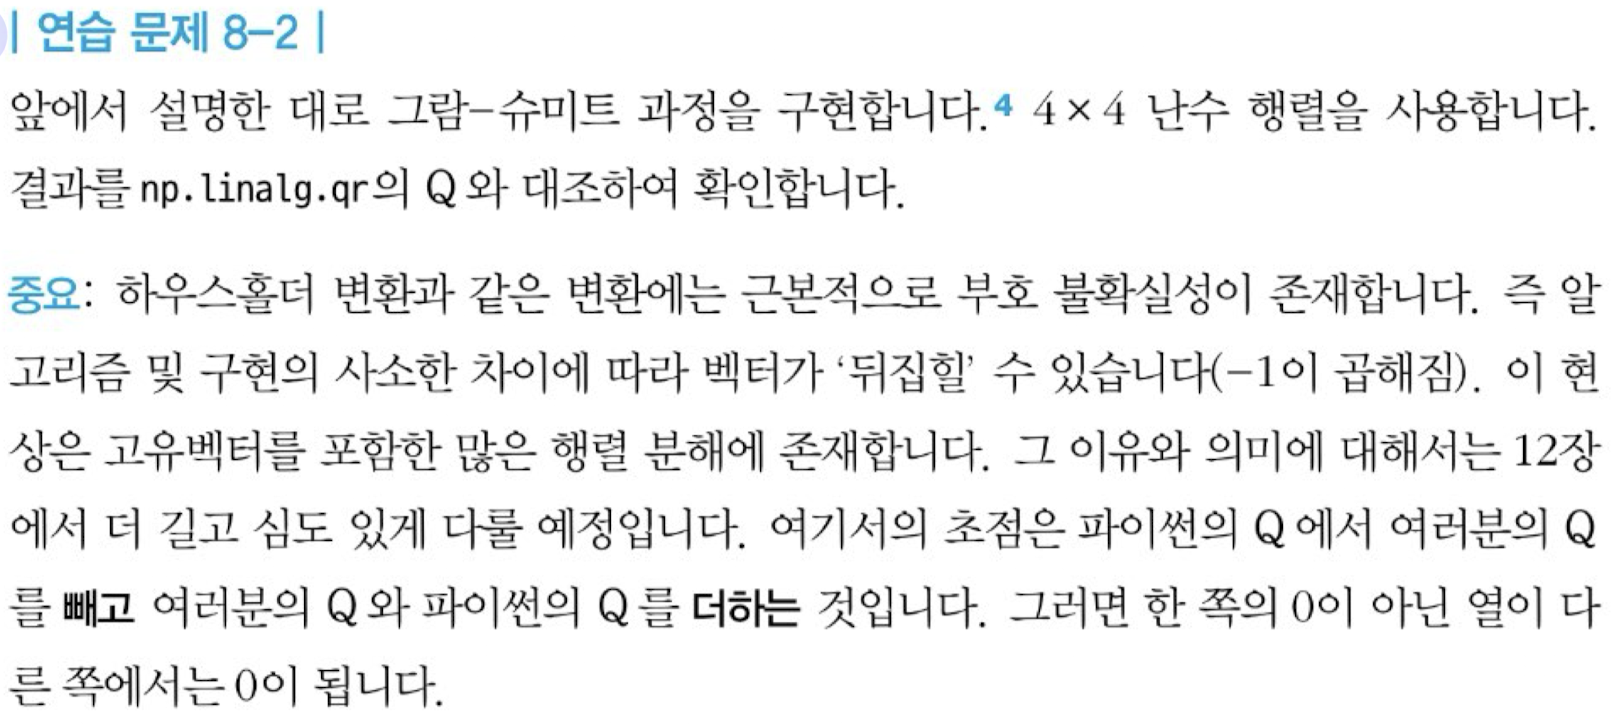

In [48]:
V = np.random.rand(4, 4)
V

array([[0.54532443, 0.65631594, 0.75430798, 0.74129877],
       [0.55822701, 0.20699315, 0.34419464, 0.23026793],
       [0.25047122, 0.33336146, 0.07468974, 0.52263592],
       [0.36536621, 0.46688897, 0.74339298, 0.56536416]])

In [49]:
def cal_proj_v(u_pre, v_main):
  proj = np.dot(u_pre, v_main) / np.dot(u_pre,u_pre) * u_pre
  return proj

In [50]:
# Empty matrix
GS_mat = 0 * V.copy()

for i in enumerate(V.T): # 이렇게 하면 열벡터가 하나씩 i로 할당

  # 첫 번째 열벡터
  if i[0] == 0: # 열벡터 인덱스 췍!
    v_1 = i[1] # 열벡터 내용물 나와라
    GS_mat[:,i[0]] = v_1 # 이게 u_1

  # 이후 벡터들
  else:
    v_i = i[1]

    # projection
    for j in range(i[0]):
      u_j = GS_mat[:,j] # i > j
      v_i -= cal_proj_v(u_j, v_i)

    GS_mat[:,i[0]] = v_i # 이게 u_i (i>1)

  # -------------- 여기까지만 하면 just ORTHOGONAL

  # Normalize
  GS_mat[:,i[0]] = GS_mat[:,i[0]] / np.linalg.norm(GS_mat[:,i[0]])

  # -------------- 여기까지 해줘야 ORTHONORMAL

GS_mat # Gram-Schmidt Matrix

array([[ 0.60771014,  0.42910236,  0.00507981, -0.66823181],
       [ 0.62208879, -0.77996348, -0.0217357 ,  0.06473066],
       [ 0.2791254 ,  0.28078645, -0.81245652,  0.42797475],
       [ 0.4071645 ,  0.35872985,  0.58259433,  0.60507339]])

In [51]:
'''
** Double-Check **
1. Orthogonality
2. Normality
'''
import itertools # 완전 탐색을 위해
a = np.arange(len(GS_mat)).tolist()
permutation_iter = list(itertools.permutations(a, 2))

# 1. Orthogonality
for i in permutation_iter:
  # print(i[0], i[1])

  if GS_mat[:,i[0]] @ GS_mat[:,i[1]] > 1e-13:
    print('Orthogonal하지 않은 열 조합 발견')
    break

print('우리의 GS_mat은 ORTHOGONAL MATRIX.')



# 2. Normality
aa = list(itertools.product(a, a))

# 차집합 구할라면 list -> set으로 우선 바꿔야 하는구나
# 반복문 돌릴라고 다시 list
iter_myself = list(set(aa) - set(permutation_iter))


for i in iter_myself:
  # print(i[0], i[1])

  if GS_mat[:,i[0]] @ GS_mat[:,i[1]] - 1 > 1e-13:
    print('Normality를 만족하지 않는 열 발견')
    break

print('우리의 GS_mat은 Normality를 만족.')

우리의 GS_mat은 ORTHOGONAL MATRIX.
우리의 GS_mat은 Normality를 만족.


### `np.linalg.qr()`과 비교

In [52]:
Q, R = np.linalg.qr(V)

In [53]:
np.round(GS_mat - Q, 5)
np.round(GS_mat + Q, 5)
# Good

array([[ 0.     ,  0.8582 ,  0.01016, -1.33646],
       [-0.     , -1.55993, -0.04347,  0.12946],
       [ 0.     ,  0.56157, -1.62491,  0.85595],
       [ 0.     ,  0.71746,  1.16519,  1.21015]])

## [Problem 8-3]
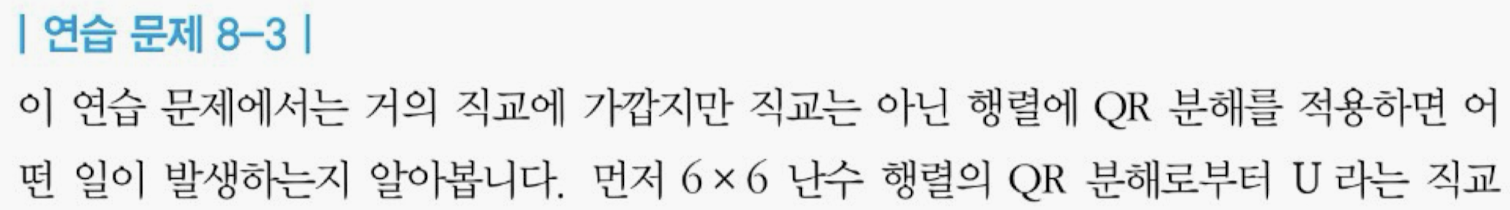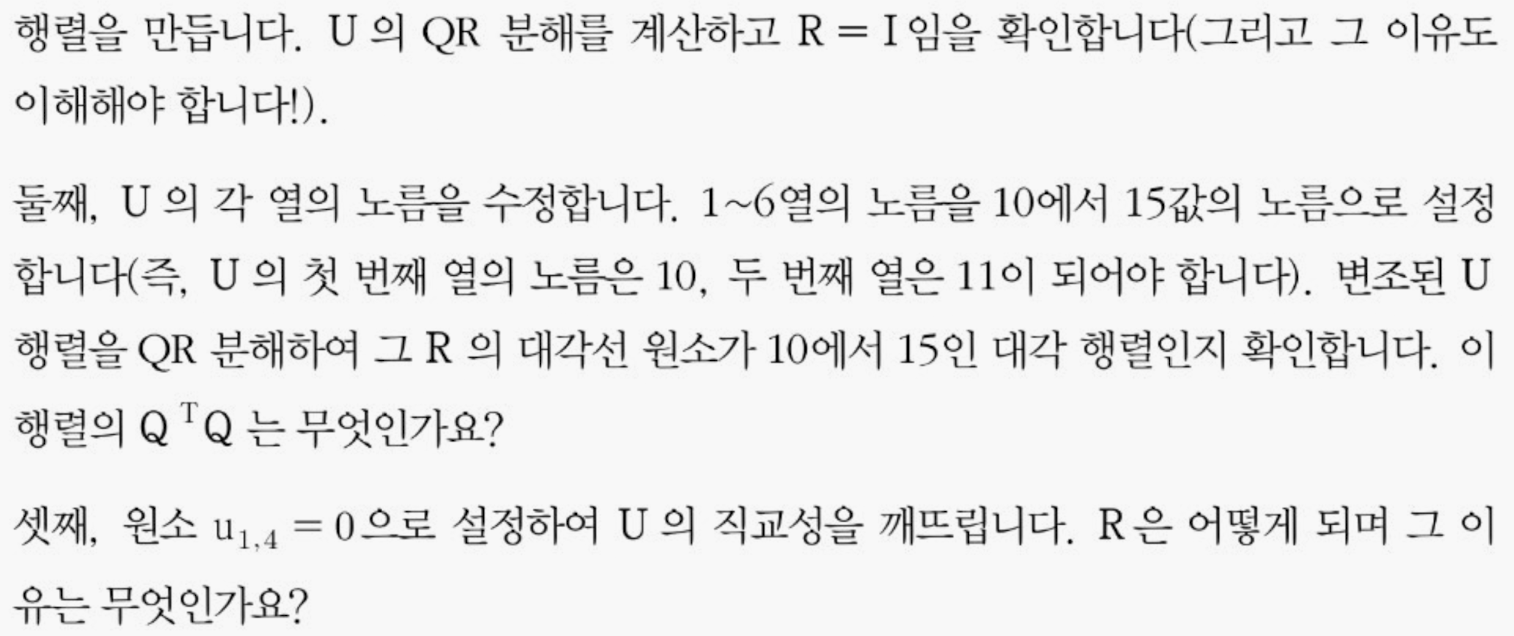

In [54]:
A = np.random.randn(6, 6)
U, R = np.linalg.qr(A)

### 1st: Orthogonal matrix의 QR Decomposition 결과 R

In [55]:
# U의 QR Decomposition
U_2, R_2 = np.linalg.qr(U)
np.round(R_2, 4) # R_2의 대각원소가 모두 1이다.

array([[ 1.,  0., -0., -0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -0.],
       [ 0.,  0.,  1.,  0., -0.,  0.],
       [ 0.,  0.,  0.,  1., -0., -0.],
       [ 0.,  0.,  0.,  0.,  1., -0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.]])

- U가 orthogonal matrix이기 때문에, 모든 열의 norm이 1이다.
- 그래서, U를 QR decomposition했을 때, U의 norm인 1이 R_2의 대각원소로 모두 등장하는 것

### 2nd: 직교행렬의 norm 변조 후 QR Decomposition

In [63]:
U

array([[-0.06865804, -0.15498068,  0.13454658,  0.81280468, -0.53825289,
        -0.05288344],
       [ 0.37995363, -0.32894778, -0.60764822, -0.046344  , -0.23142172,
         0.56788067],
       [-0.19540224, -0.7163917 , -0.31168731, -0.06711695,  0.1088091 ,
        -0.57888497],
       [ 0.4380728 , -0.01161794,  0.24850036, -0.45874728, -0.65011976,
        -0.33630351],
       [ 0.33553695,  0.527031  , -0.56608589,  0.2415483 ,  0.07532632,
        -0.47453178],
       [-0.71291406,  0.27687655, -0.36511124, -0.25278737, -0.46535861,
         0.03642269]])

In [73]:
# T = np.array([[np.sqrt(10), np.sqrt(11), np.sqrt(12), np.sqrt(13), np.sqrt(14), np.sqrt(15) ],
#               [np.sqrt(10), np.sqrt(11), np.sqrt(12), np.sqrt(13), np.sqrt(14), np.sqrt(15) ],
#               [np.sqrt(10), np.sqrt(11), np.sqrt(12), np.sqrt(13), np.sqrt(14), np.sqrt(15) ],
#               [np.sqrt(10), np.sqrt(11), np.sqrt(12), np.sqrt(13), np.sqrt(14), np.sqrt(15) ],
#               [np.sqrt(10), np.sqrt(11), np.sqrt(12), np.sqrt(13), np.sqrt(14), np.sqrt(15) ],
#               [np.sqrt(10), np.sqrt(11), np.sqrt(12), np.sqrt(13), np.sqrt(14), np.sqrt(15)],
#               ])

# t = np.array([np.sqrt(10), np.sqrt(11), np.sqrt(12), np.sqrt(13), np.sqrt(14), np.sqrt(15)])
t = np.array([10, 11, 12, 13, 14, 15]) # sqrt를 곱하는 게 아녔다 바보

U_trans = t * U # 브로드캐스팅 체고
U_trans

array([[-0.68658044, -1.70478753,  1.61455892, 10.56646086, -7.53554044,
        -0.79325155],
       [ 3.79953628, -3.6184256 , -7.29177861, -0.60247204, -3.23990415,
         8.51821012],
       [-1.9540224 , -7.88030874, -3.74024768, -0.87252031,  1.52332733,
        -8.68327457],
       [ 4.38072795, -0.1277973 ,  2.98200433, -5.96371458, -9.10167669,
        -5.04455263],
       [ 3.35536954,  5.79734096, -6.79303069,  3.14012792,  1.05456844,
        -7.11797668],
       [-7.1291406 ,  3.04564203, -4.38133492, -3.2862358 , -6.5150205 ,
         0.54634039]])

In [75]:
Q_trans, R_trans = np.linalg.qr(U_trans)
np.round(R_trans, 4) # diagonal element가 U_trans의 norm

array([[10.,  0.,  0., -0.,  0.,  0.],
       [ 0., 11.,  0.,  0., -0.,  0.],
       [ 0.,  0., 12., -0., -0.,  0.],
       [ 0.,  0.,  0., 13., -0., -0.],
       [ 0.,  0.,  0.,  0., 14., -0.],
       [ 0.,  0.,  0.,  0.,  0., 15.]])

### 3rd: U가 더이상 Orthgonal mat이 아닐 때

In [79]:
U_new = U.copy()
U_new[0, 3] = 0
U_new # orthogonal X

array([[-0.06865804, -0.15498068,  0.13454658,  0.        , -0.53825289,
        -0.05288344],
       [ 0.37995363, -0.32894778, -0.60764822, -0.046344  , -0.23142172,
         0.56788067],
       [-0.19540224, -0.7163917 , -0.31168731, -0.06711695,  0.1088091 ,
        -0.57888497],
       [ 0.4380728 , -0.01161794,  0.24850036, -0.45874728, -0.65011976,
        -0.33630351],
       [ 0.33553695,  0.527031  , -0.56608589,  0.2415483 ,  0.07532632,
        -0.47453178],
       [-0.71291406,  0.27687655, -0.36511124, -0.25278737, -0.46535861,
         0.03642269]])

In [81]:
Q_new, R_new = np.linalg.qr(U_new)

np.round(R_new, 4) # 난 이 이유를 잘 모르겠다

array([[ 1.    ,  0.    , -0.    ,  0.0558,  0.    ,  0.    ],
       [ 0.    ,  1.    ,  0.    ,  0.126 ,  0.    , -0.    ],
       [ 0.    ,  0.    ,  1.    , -0.1094, -0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.5553,  0.7878,  0.0774],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.6159, -0.099 ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.9921]])

## [Problem 8-6]
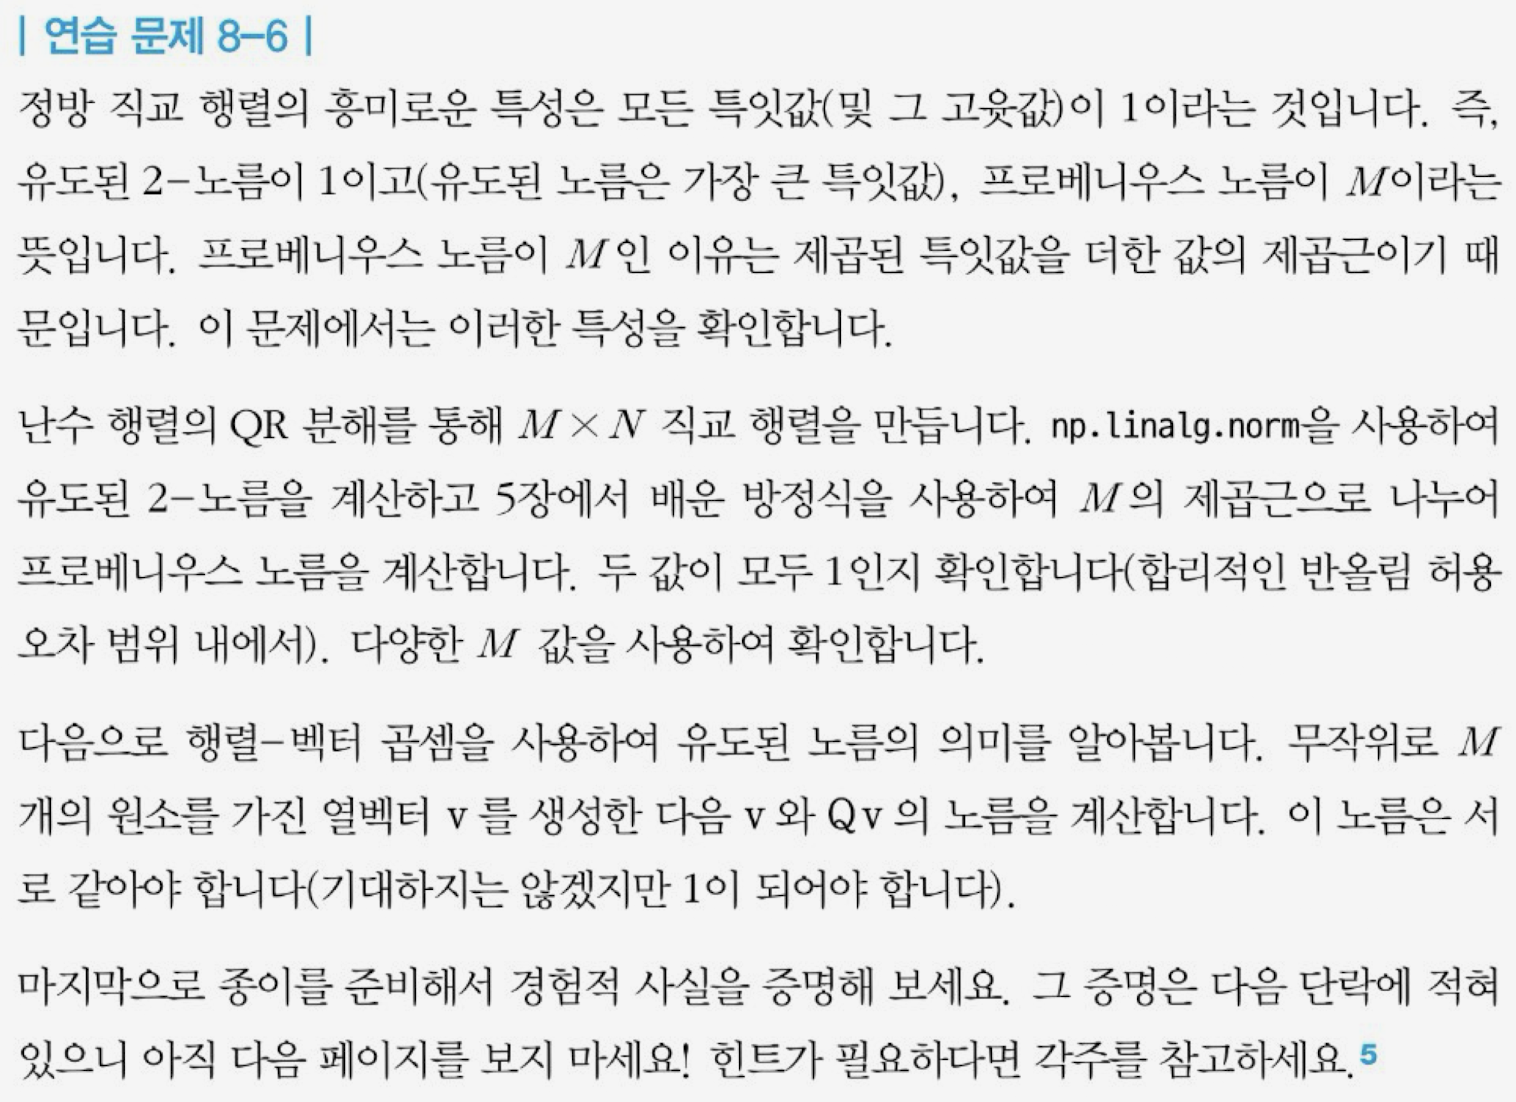

In [82]:
M = 5
N = 6

In [85]:
A = np.random.randn(M, N)
Q, R = np.linalg.qr(A, mode = 'complete')
Q # MXN ortho mat

array([[-0.05924083, -0.6247195 , -0.6558845 , -0.32724962,  0.2625629 ],
       [ 0.29446031, -0.45498876, -0.12370155,  0.6826826 , -0.4742581 ],
       [ 0.87590213, -0.08846006,  0.20265005, -0.42707027, -0.03891305],
       [ 0.04091788, -0.37338706,  0.48035328,  0.32325828,  0.72365229],
       [ 0.37537294,  0.50543812, -0.53170211,  0.37412193,  0.42538583]])

In [87]:
# np.linalg.norm을 통한 연산
np.linalg.norm(Q, 2)

1.0000000000000002

In [93]:
# Frobenius를 통한 연산
np.sqrt(np.trace(Q.T @ Q)) # Frobenius norm = M

np.sqrt(np.trace(Q.T @ Q)) / np.sqrt(M) # M의 제곱근으로 나눔

1.0

In [99]:
# 여러 N에 대해 해봅시다
N = 6
for M in range(2, 10):
  A = np.random.randn(M, N)
  Q, R = np.linalg.qr(A, mode = 'complete')

  print(f'M={M}일 때:')
  print('', np.round(np.linalg.norm(Q, 2), 3),'\n', np.round(np.sqrt(np.trace(Q.T @ Q)) / np.sqrt(M), 3))

  print()

M=2일 때:
 1.0 
 1.0

M=3일 때:
 1.0 
 1.0

M=4일 때:
 1.0 
 1.0

M=5일 때:
 1.0 
 1.0

M=6일 때:
 1.0 
 1.0

M=7일 때:
 1.0 
 1.0

M=8일 때:
 1.0 
 1.0

M=9일 때:
 1.0 
 1.0



### 행렬-벡터 곱셈을 사용해서 induced norm의 의미 파악해보기

In [101]:
v = np.random.randn(M)
v

array([ 0.9520595 ,  0.26736874,  0.17865326, -0.94806132,  0.86994317,
       -0.01753685,  0.940525  , -1.37788769, -0.22892128])

In [104]:
np.round(np.linalg.norm(v, 2), 3) == np.round(np.linalg.norm(Q@v, 2), 3) # "기대하지는 않겠지만, 1이 되어야 합니다"가 무슨 의미일까?

True

### 손으로 해보기

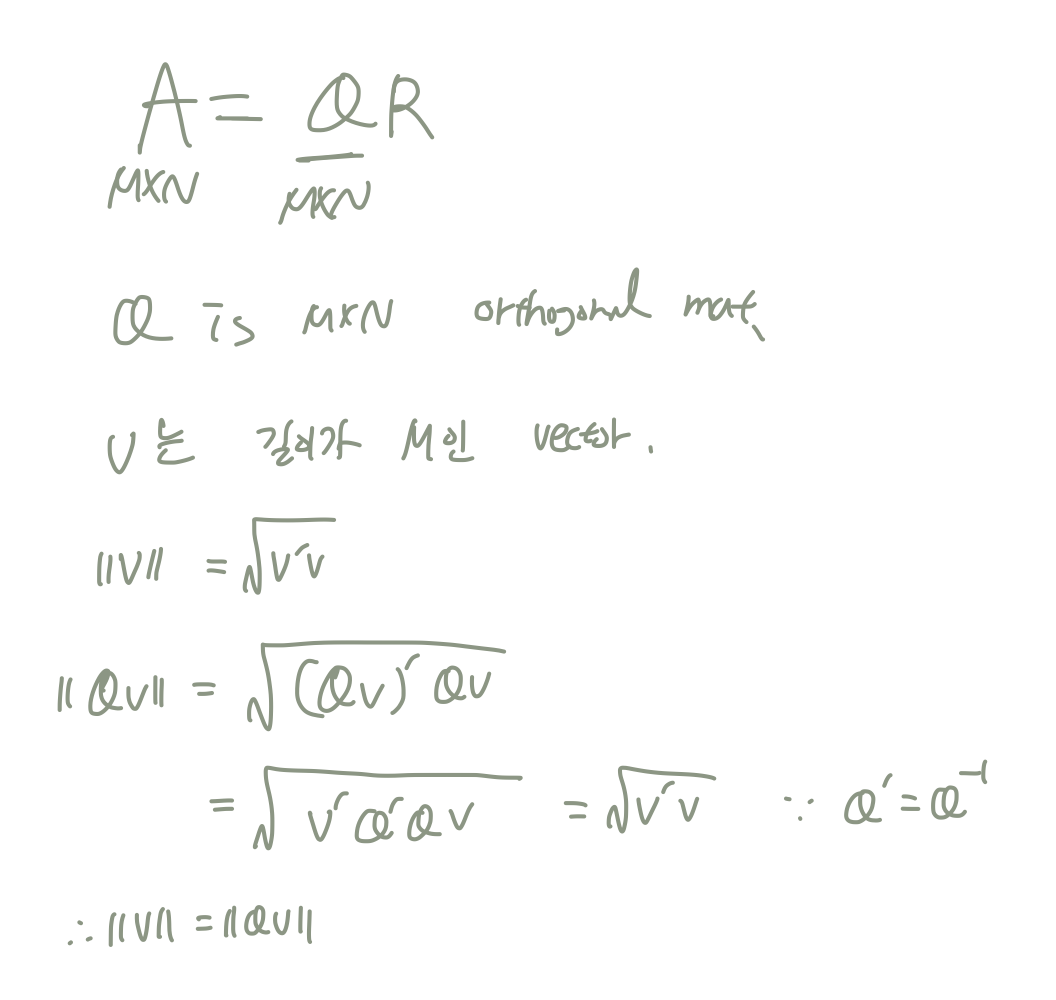

## [Problem 8-7]

In [109]:
M = 10
N = 4

In [110]:
A = np.random.randn(M, N)
A

array([[-0.54450087,  1.82716493, -0.95863757,  1.00601126],
       [ 0.73005541,  3.13712204,  2.88771901,  0.30845384],
       [ 0.95215283, -1.80327265,  0.77142849,  1.03640115],
       [-0.82879894,  0.39096649, -1.03733495, -0.03408738],
       [ 0.55161786, -0.22998715,  1.86709118, -0.73617157],
       [ 0.64114537,  1.30119308,  2.08147971,  1.21938065],
       [-1.34953167, -1.02373748, -0.18783823, -0.43829295],
       [ 0.78931882,  1.2718467 , -0.32899645,  0.44865427],
       [-0.13844698,  0.33667523, -0.24903472,  1.28950887],
       [-0.38297193,  0.91790971,  0.7127685 ,  0.27109962]])

In [111]:
Q, R = np.linalg.qr(A, 'complete')

In [112]:
np.round(R, 3)

array([[ 2.398,  0.813,  2.646,  0.722],
       [ 0.   , -4.614, -1.297, -0.822],
       [ 0.   ,  0.   , -3.283,  0.379],
       [ 0.   ,  0.   ,  0.   ,  2.236],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ]])

### (1) R의 처음 N개의 행을 구성하는 행렬은 square & full rank

In [119]:
R_u = R[:N, :]
R_u_inv = np.linalg.inv(R_u)
np.round(R_u_inv, 3)

array([[ 0.417,  0.073,  0.307, -0.16 ],
       [-0.   , -0.217,  0.086, -0.094],
       [-0.   , -0.   , -0.305,  0.052],
       [ 0.   ,  0.   ,  0.   ,  0.447]])

#### (2) Tall matrix는 MP-inverse를 갖는다

In [121]:
R_pinv = np.round(np.linalg.pinv(R), 3)
R_pinv

array([[ 0.417,  0.073,  0.307, -0.16 ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [ 0.   , -0.217,  0.086, -0.094,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [-0.   , -0.   , -0.305,  0.052,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [-0.   , -0.   , -0.   ,  0.447,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ]])

In [123]:
R_pinv[:, :N] # 같다 !

array([[ 0.417,  0.073,  0.307, -0.16 ],
       [ 0.   , -0.217,  0.086, -0.094],
       [-0.   , -0.   , -0.305,  0.052],
       [-0.   , -0.   , -0.   ,  0.447]])